In [2]:
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import io
import requests
from scipy.stats import norm

In [3]:
tdata = pd.read_csv(r'thoriumdata.csv')
todata = pd.read_csv(r'Thorium2.csv')
t2data = todata.sum(axis=1)

udata = pd.read_csv(r'unknowndata.csv')
uodata = pd.read_csv(r'Unknown2.csv')
uadata = uodata.sum(axis=1)
u2data = uadata.loc[0:20]


In [4]:
print(tdata)
print(t2data)

print(udata)
print(u2data)


           Time  CPM
0  1.635382e+09   63
1  1.635382e+09   76
2  1.635383e+09   65
3  1.635383e+09   70
4  1.635383e+09   65
0     1300
1     1289
2     1357
3     1321
4     1274
5     1230
6     1296
7     1287
8     1306
9     1273
10    1327
11    1277
12    1299
13    1313
dtype: int64
           Time  CPM
0  1.635383e+09   75
1  1.635383e+09   74
2  1.635383e+09   69
3  1.635384e+09   72
4  1.635384e+09   66
0     960
1     962
2     911
3     928
4     954
5     942
6     930
7     879
8     961
9     958
10    920
11    917
12    949
13    982
14    900
15    955
16    928
17    908
18    943
19    910
20    949
dtype: int64


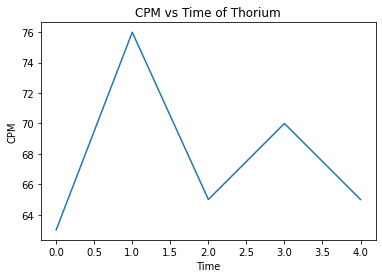

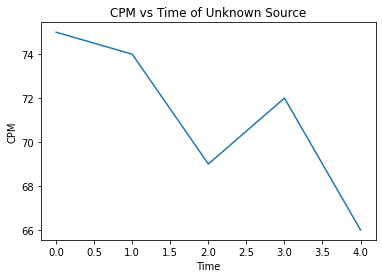

In [5]:
plt.plot(tdata["CPM"])
plt.title('CPM vs Time of Thorium')
plt.ylabel('CPM')
plt.xlabel("Time")
plt.show()

plt.plot(udata["CPM"])
plt.title('CPM vs Time of Unknown Source')
plt.ylabel('CPM')
plt.xlabel("Time")
plt.show()



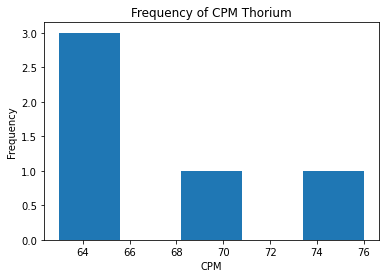

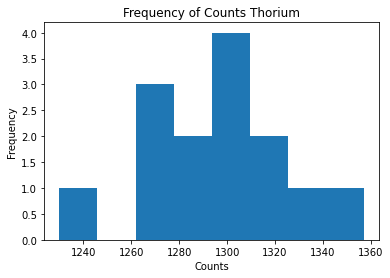

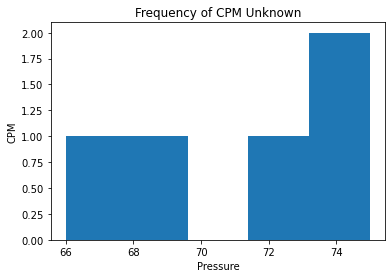

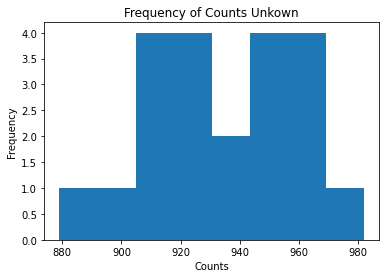

In [6]:
#nbins = np.max(tdata["CPM"]) - np.min(tdata["CPM"])
nbins = 5

plt.hist(tdata["CPM"], bins = nbins)
plt.ylabel('Frequency')
plt.xlabel('CPM')
plt.title("Frequency of CPM Thorium")
plt.show()

#nbins = np.max(t2data) - np.min(t2data)
nbins = 8

plt.hist(t2data, bins = nbins)
plt.ylabel('Frequency')
plt.xlabel('Counts')
plt.title("Frequency of Counts Thorium")
plt.show()

#nbins = np.max(udata["CPM"]) - np.min(udata["CPM"])
nbins = 5

plt.hist(udata["CPM"], bins = nbins)
plt.ylabel('CPM')
plt.xlabel('Pressure')
plt.title("Frequency of CPM Unknown")
plt.show()

nbins = 8

plt.hist(u2data, bins = nbins)
plt.ylabel('Frequency')
plt.xlabel('Counts')
plt.title("Frequency of Counts Unkown")
plt.show()

In [7]:
tmu = np.mean(tdata['CPM'])
tsigma = np.std(tdata['CPM'])

t2mu = np.mean(t2data)
t2sigma = np.std(t2data)

umu = np.mean(udata['CPM'])
usigma = np.std(udata['CPM'])

u2mu = np.mean(u2data)
u2sigma = np.std(u2data)

print(tmu)
print(tsigma)
print(tsigma/tmu)
print()
print(t2mu)
print(t2sigma)
print(t2sigma/t2mu)
print()
print(umu)
print(usigma)
print(usigma/umu)
print()
print(u2mu)
print(u2sigma)
print(u2sigma/u2mu)

67.8
4.707440918375928
0.06943128198194584

1296.357142857143
28.75911567996967
0.02218456220836274

71.2
3.3105890714493698
0.04649703752035631

935.5238095238095
24.872281469288826
0.026586476170979607


It's clear that the spectrometer sensor is much more sensitive as it had CPM values many orders of magnitude larger.  In addition it appears that the spectrometer has a lower uncertainty most likey because more samples were taken.

In [8]:
ttc = sum(tdata['CPM'])*5
tuncertainty = math.sqrt(ttc)
tpuncertainty = tuncertainty/ttc
print(tpuncertainty)

t2tc = sum(t2data)
t2uncertainty = math.sqrt(t2tc)
t2puncertainty = t2uncertainty/t2tc
print(t2puncertainty)


utc = sum(udata['CPM'])*5
uuncertainty = math.sqrt(utc)
upuncertainty = uuncertainty/utc
print(upuncertainty)

u2tc = sum(u2data)
u2uncertainty = math.sqrt(u2tc)
u2puncertainty = u2uncertainty/u2tc
print(u2puncertainty)



0.02428930837786301
0.0074229006806908245
0.02370227315699886
0.007134489943759798


The theoretical uncertainty is much lower than what was actually calculated from the data.

A = .1Kg * (30,593Bq/.25Kg) = 12,237.2Bq

In [9]:
A = 12237.2

tcps = ttc/(5*60)
te = tcps/A
teuncert = te*tpuncertainty
print("Our Detector Efficiency is ", te)
print("Uncertainty on Our Detector Efficiency is ", teuncert)

t2cps = t2tc/(60)
t2e = t2cps/A
t2euncert = t2e*t2puncertainty
print("Other Detector Efficiency is ", t2e)
print("Uncertainty on Other Detector Efficiency is ", t2euncert)

Our Detector Efficiency is  0.0004617069264210767
Uncertainty on Our Detector Efficiency is  1.121454191603684e-05
Other Detector Efficiency is  0.024718345155209796
Uncertainty on Other Detector Efficiency is  0.00018348182107815755


The other detector is much more sensitive.  Although according to the data neither of the sensors were anywhere close to the actual value, the other sensor was multiple magnitudes closer to the real value than our sensor was.

In [11]:
A1 = utc/te

A2 = u2tc/t2e

puncertA1 = math.sqrt((teuncert**2)+ (upuncertainty**2))
uncertA1 = A1*puncertA1

puncertA2 = math.sqrt((t2euncert**2)+ (u2puncertainty**2))
uncertA2 = A2*puncertA2

print("Activity according to our sensor", A1)
print("With uncertainty", uncertA1)
print("Activity according to other sensor", A2)
print("With uncertainty", uncertA2)

Activity according to our sensor 3855259.469026549
With uncertainty 91378.42325411382
Activity according to other sensor 794794.3066835639
With uncertainty 5672.326879775684


Both of the uncertainties should be lower assuming the groups all collected data with the same constant variables.  This would be because the data would better reflect the underlying probabilitiy distribution.